In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
full_df = pd.read_csv("../../MVP/Data/full_df.csv")
full_df.head()

,dates,stock,open,close,high,low,volume,category
0,2020-03-27,NFLX,359.09,357.12,368.56,353.0000,7922664,Entertainment
1,2020-03-26,NFLX,344.00,362.99,363.84,341.7300,7235016,Entertainment
2,2020-03-25,NFLX,361.02,342.39,362.00,339.1700,8767171,Entertainment
3,2020-03-24,NFLX,369.99,357.32,372.93,353.0301,11638683,Entertainment
4,2020-03-23,NFLX,347.89,360.27,366.11,340.8838,13449378,Entertainment


In [5]:
ent_df = full_df[full_df['category'] == 'Entertainment']
food_df = full_df[full_df['category'] == 'Food']
ess_df = full_df[full_df['category'] == 'Essentials']
cars_df = full_df[full_df['category'] == 'Cars']
tech_df = full_df[full_df['category'] == 'Tech']
global_df = full_df[full_df['category'] == 'Global']
comm_df = full_df[full_df['category'] == 'Commodities']
index_df = full_df[full_df['category'] == 'Index']
etf_df = full_df[full_df['category'] == 'ETF']

xticks = ["2019-02-01", "2019-03-01", "2019-04-01", "2019-05-01", "2019-06-03", "2019-07-01", "2019-08-01", "2019-09-03", "2019-10-01", "2019-11-01", "2019-12-02", "2020-01-02", "2020-02-03", "2020-03-02", "2020-03-26"]
places = [0, 18, 37, 58, 79, 99, 122, 142, 164, 186, 206, 228, 249, 270, 289]

In [36]:
def plot_data(df, title):
    df = df.sort_values('dates', ascending=True)
    groupdf = df.groupby('stock')
    
    stock = groupdf.stock.unique()
    stock_list = stock.index
    
    ax = plt.subplot(111)
    groupdf.plot(y='close', x='dates', kind='line', ax=ax, figsize=(20,10))
    plt.legend(stock_list, loc='best') #change legend to report the correct stock
    plt.xticks(places, xticks)
    plt.ylim(0)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Prices')
    plt.title(title)
    plt.tight_layout()
    return ax

In [75]:
def plot_data_outlier(outlier_df, other_df, title1, title2):
    outlier_df = outlier_df.sort_values('dates', ascending=True)
    other_df = other_df.sort_values('dates', ascending=True)
    groupdf = other_df.groupby('stock')
    
    stock = groupdf.stock.unique()
    stock_list = stock.index
    
    
    fig = plt.figure(figsize=(20,10))
    
    ax = fig.add_subplot(211)
    outlier_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False, color='m')
    plt.xticks(places, xticks)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title1)
    
    ax = fig.add_subplot(212)
    groupdf.plot(y='close', x='dates', kind='line', ax=ax)
    plt.legend(stock_list, loc='best') #change legend to report the correct stock
    plt.ylim(0)
    plt.xticks(places, xticks)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title2)
    plt.tight_layout()
    return fig

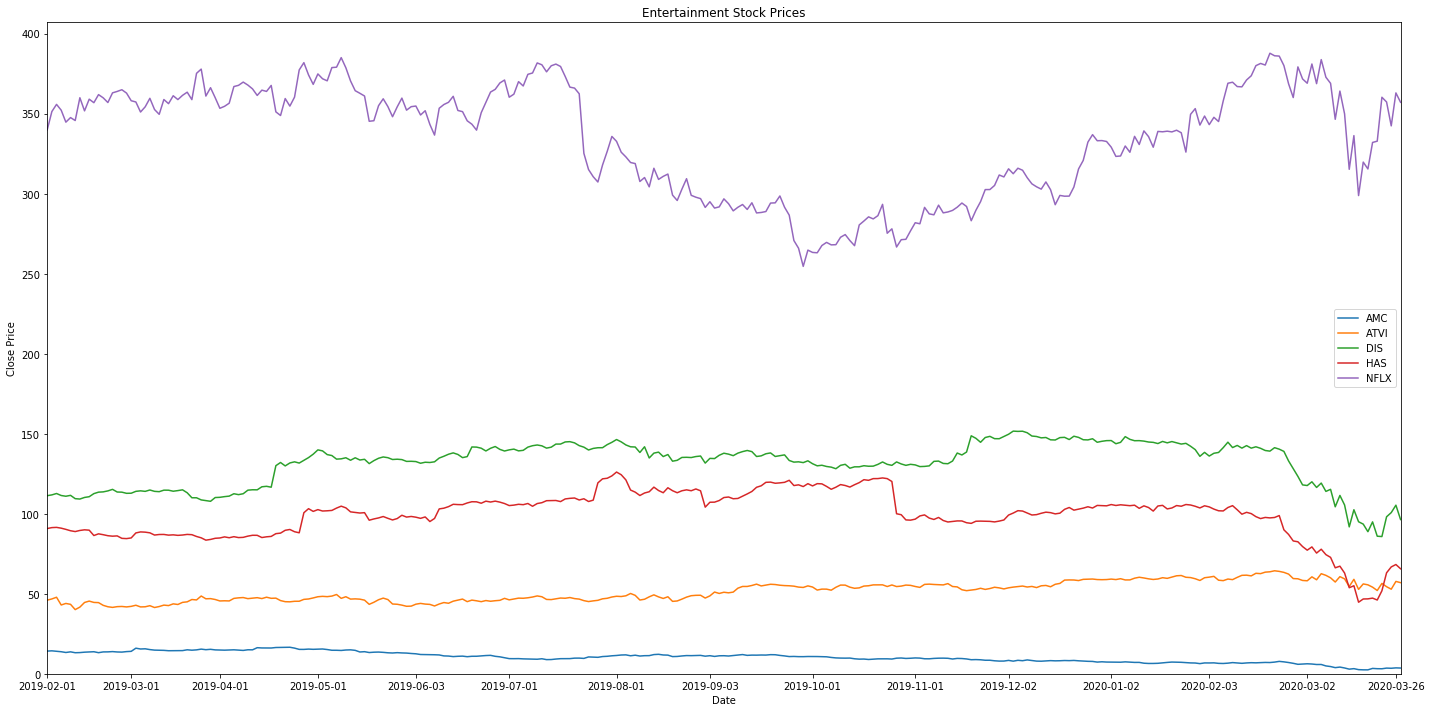

In [73]:
ent_chart = plot_data(ent_df, 'Entertainment Stock Prices')

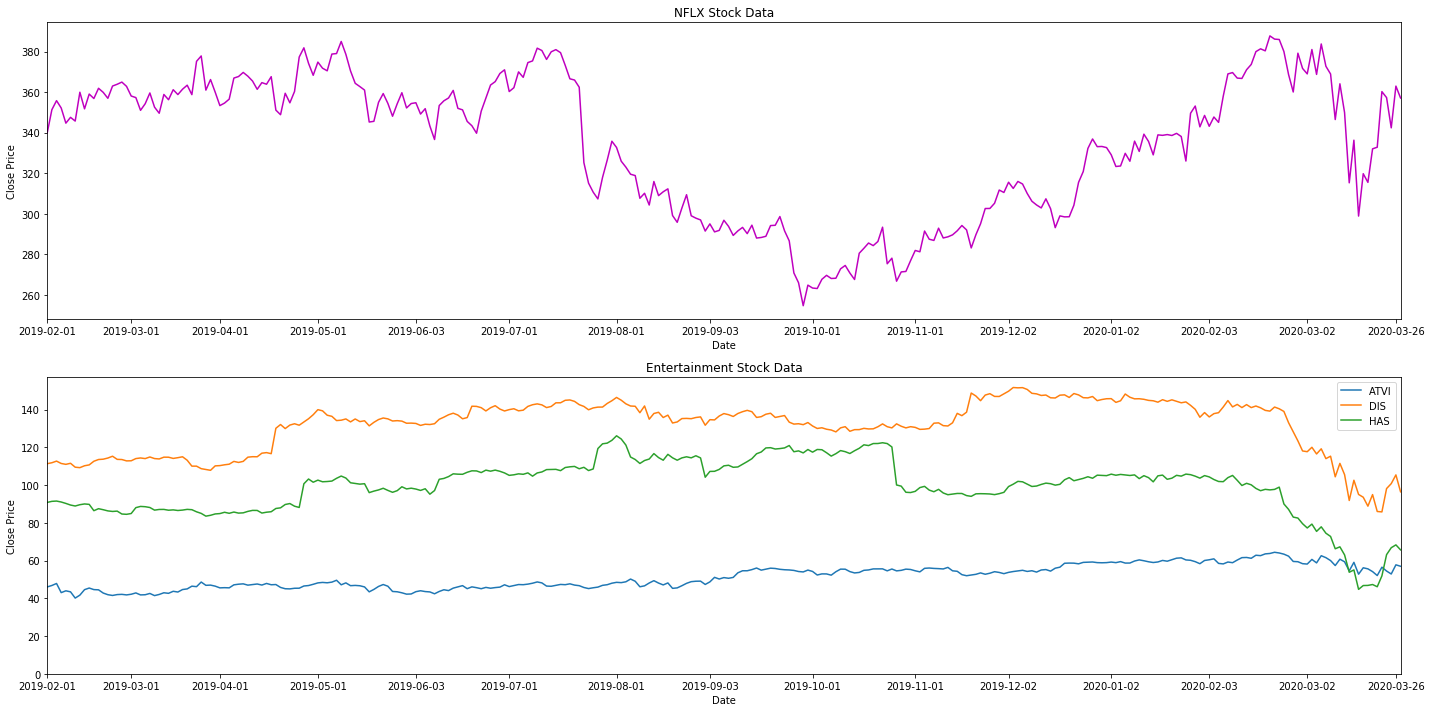

In [81]:
cond = ((ent_df['stock'] == 'ATVI') | (ent_df['stock'] == 'DIS') | (ent_df['stock'] == 'HAS'))
ent2_df = ent_df[cond]
nflx_df = ent_df[ent_df['stock'] == 'NFLX']
ent2_chart = plot_data_outlier(nflx_df, ent2_df, 'NFLX Stock Data', 'Entertainment Stock Data')

plt.savefig('ent_chart.svg')

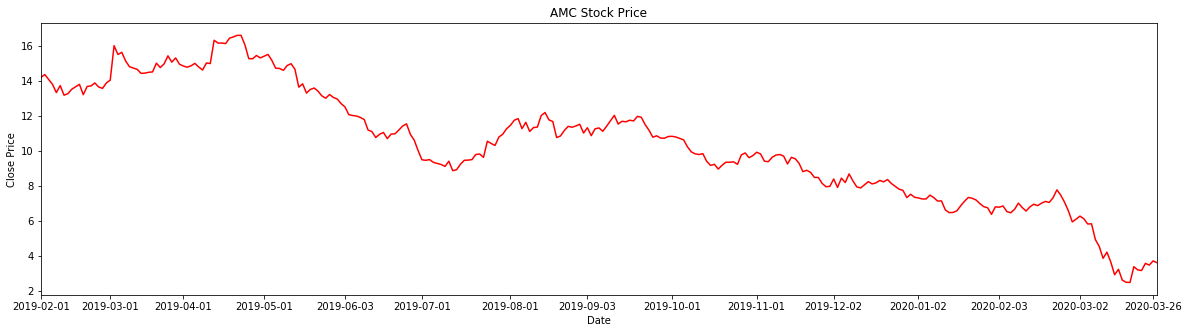

In [82]:
amc_df = ent_df[ent_df['stock'] == 'AMC']

amc_df = amc_df.sort_values('dates', ascending=True)

ax = plt.subplot(111)
amc_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False, figsize=(20,5), color='r')
plt.xticks(places, xticks)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AMC Stock Price')

plt.savefig('amc_chart.svg')

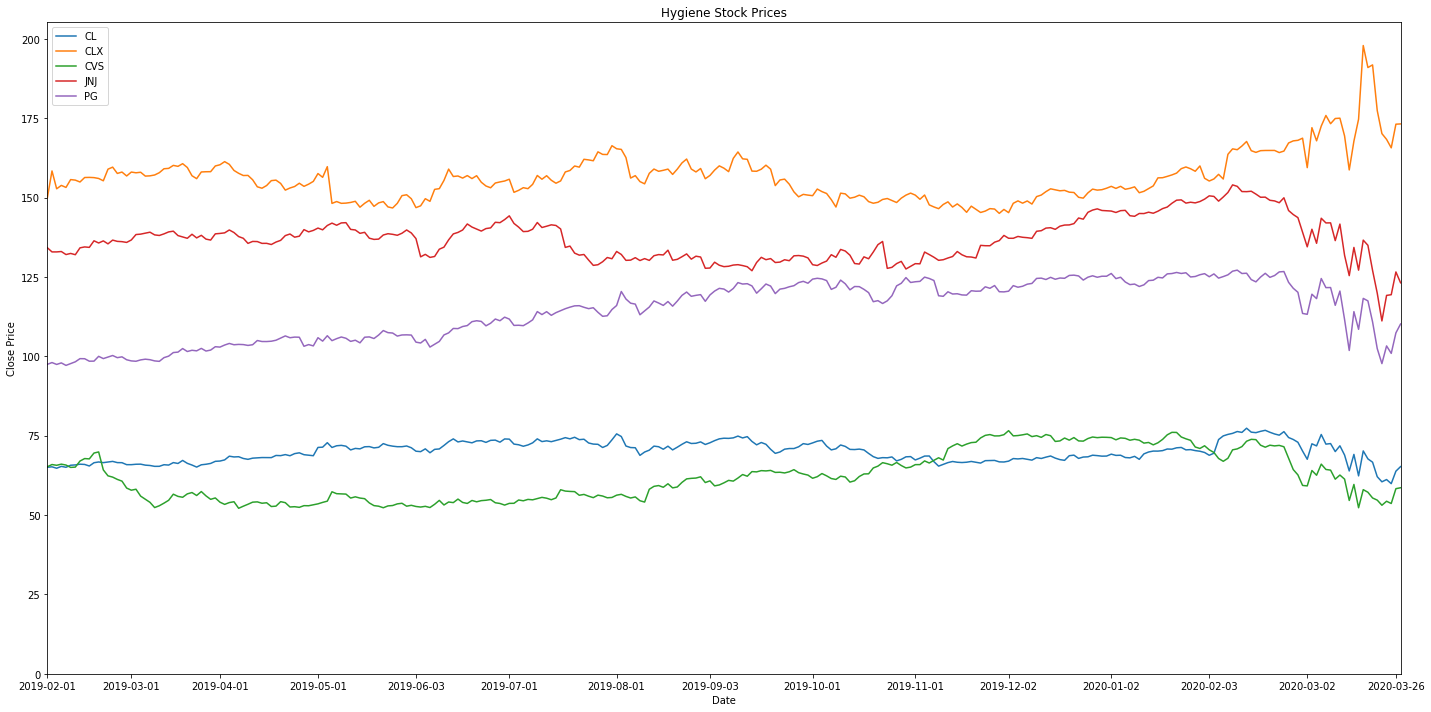

In [84]:
ess_chart = plot_data(ess_df, 'Hygiene Stock Prices')
plt.savefig('ess_chart.svg')

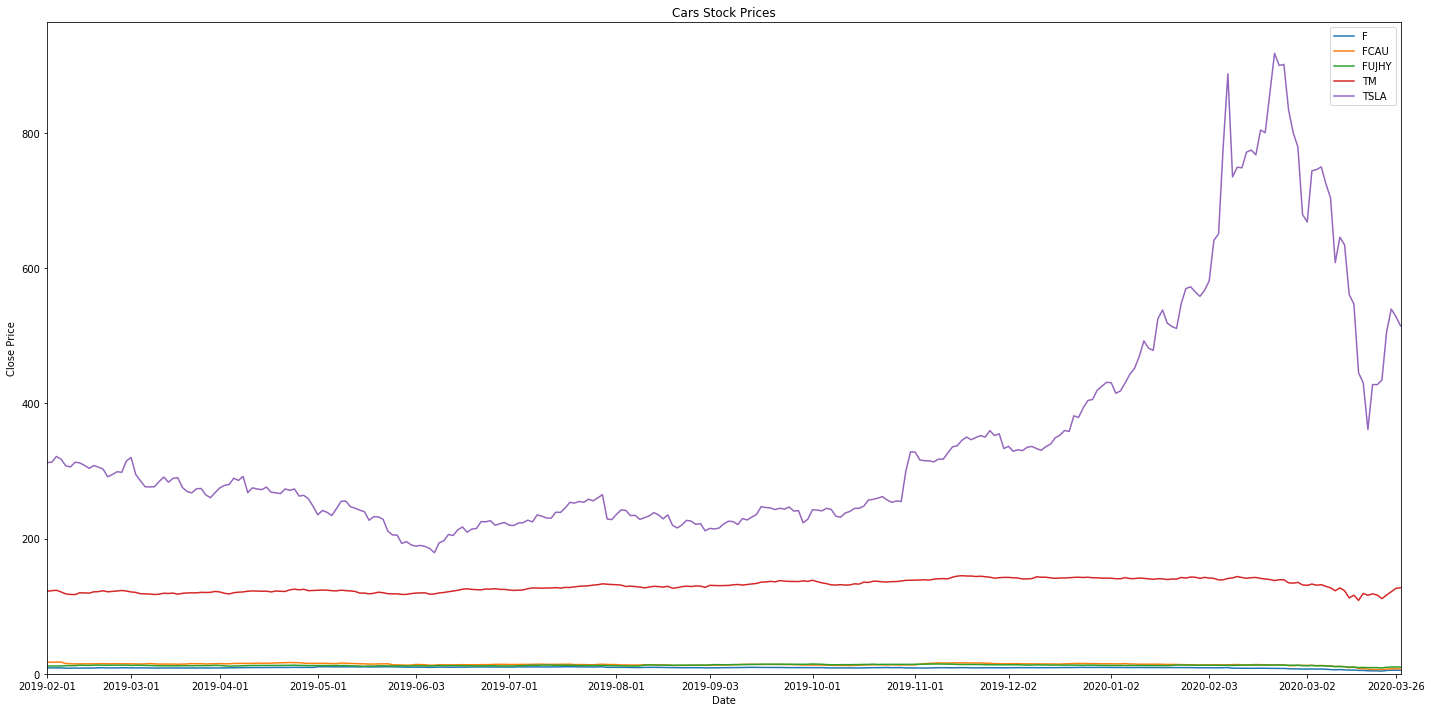

In [40]:
cars_chart = plot_data(cars_df, 'Cars Stock Prices')

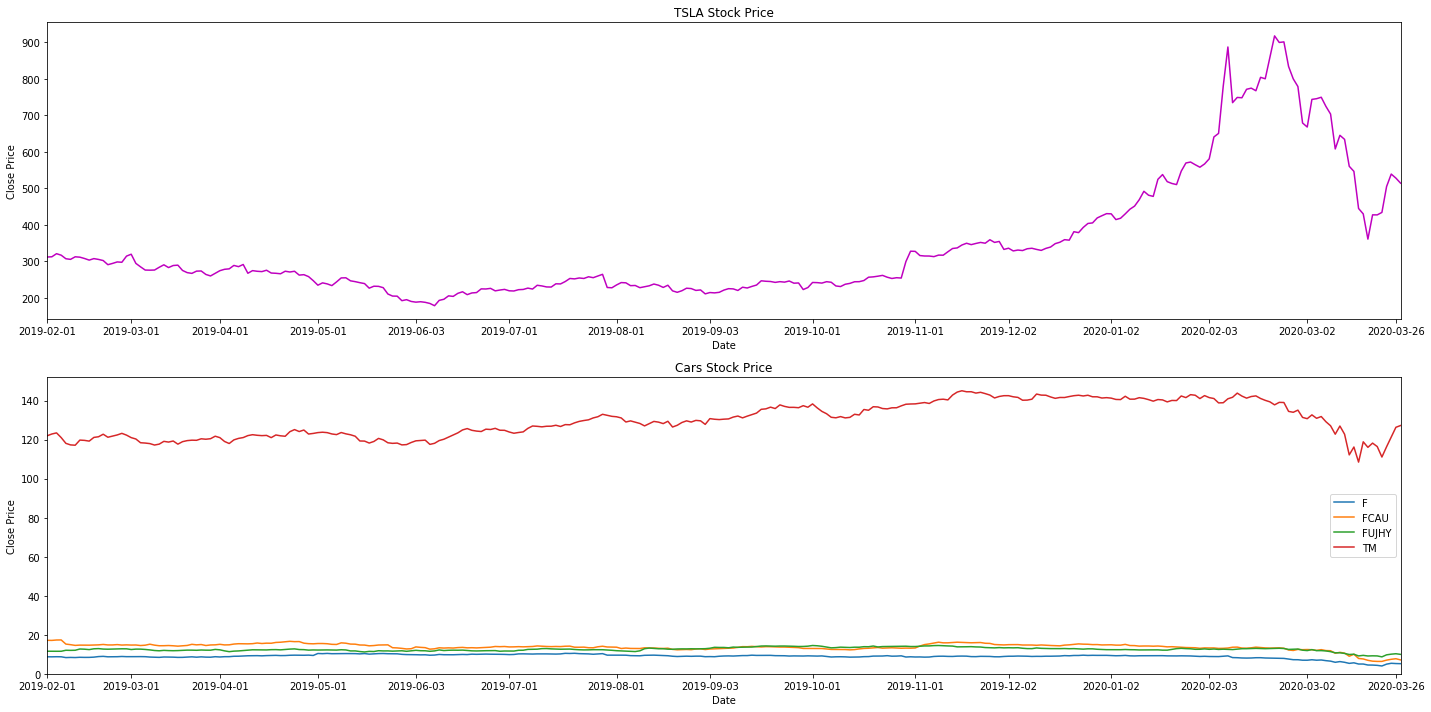

In [85]:
cond = ((cars_df['stock'] == 'F') | (cars_df['stock'] == 'FCAU') | (cars_df['stock'] == 'FUJHY') | (cars_df['stock'] == 'TM'))
cars2_df = cars_df[cond]
tsla_df = cars_df[cars_df['stock'] == 'TSLA']
cars2_chart = plot_data_outlier(tsla_df, cars2_df, 'TSLA Stock Price', 'Cars Stock Price')
plt.savefig('cars_chart.svg')

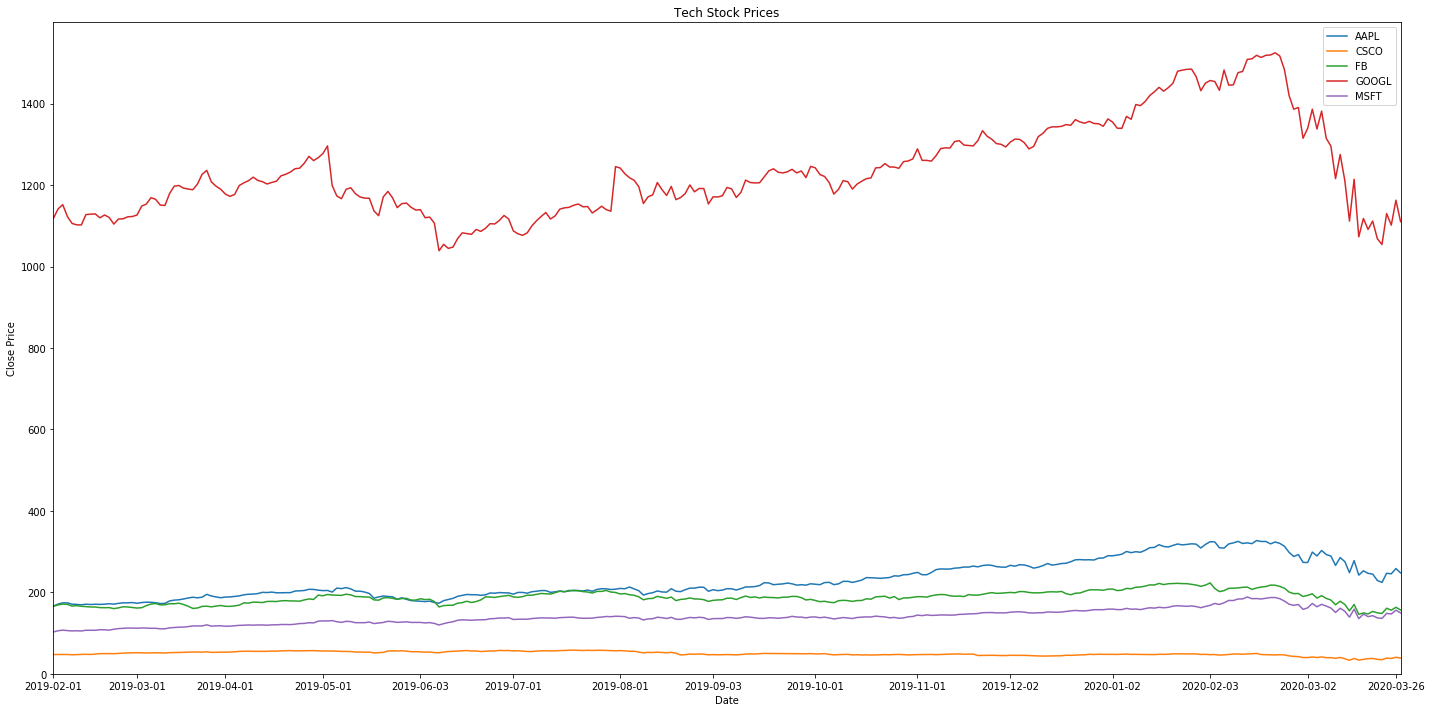

In [42]:
tech_chart = plot_data(tech_df, 'Tech Stock Prices')

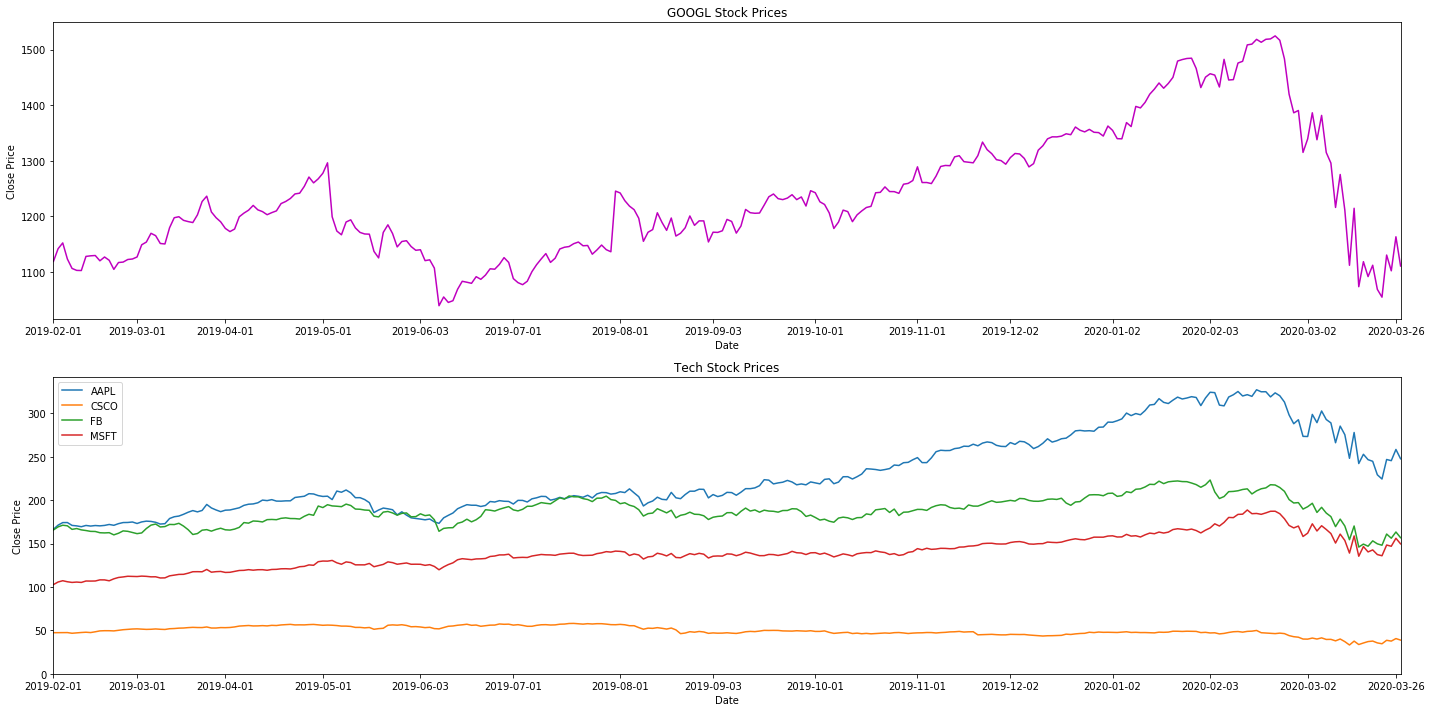

In [86]:
cond = ((tech_df['stock'] == 'AAPL') | (tech_df['stock'] == 'FB') | (tech_df['stock'] == 'MSFT') | (tech_df['stock'] == 'CSCO'))
tech2_df = tech_df[cond]
googl_df = tech_df[tech_df['stock'] == 'GOOGL']
tech2_chart = plot_data_outlier(googl_df, tech2_df, "GOOGL Stock Prices", "Tech Stock Prices")
plt.savefig('tech_chart.svg')

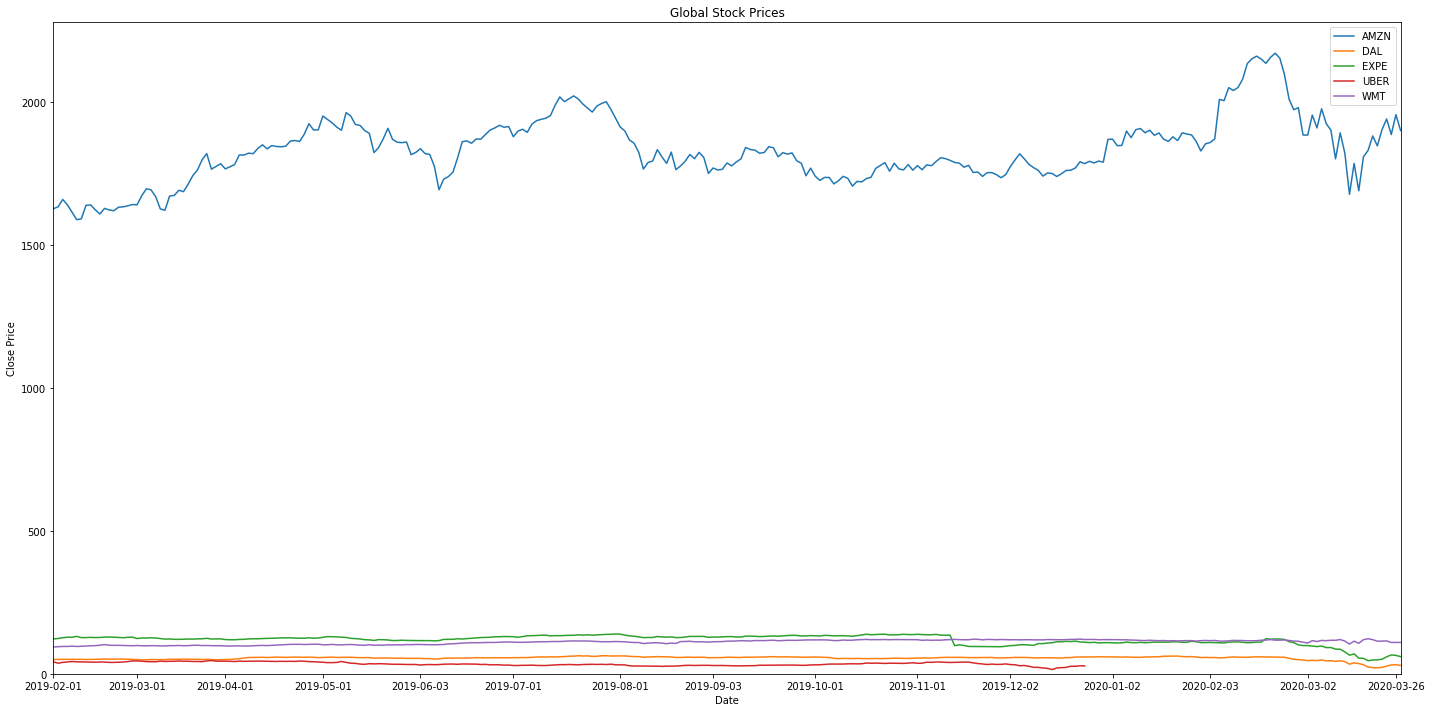

In [45]:
global_chart = plot_data(global_df, 'Global Stock Prices')

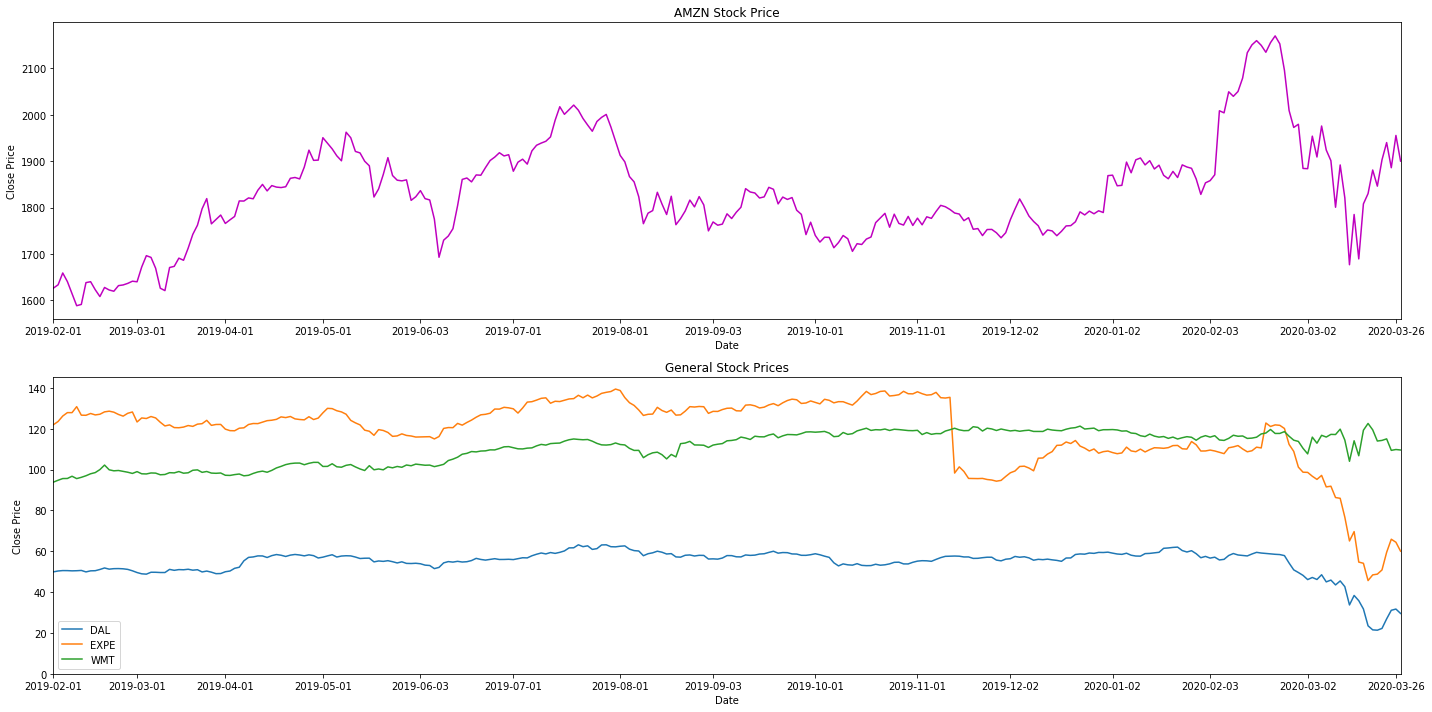

In [87]:
cond = ((global_df['stock'] == 'DAL') | (global_df['stock'] == 'EXPE') | (global_df['stock'] == 'WMT'))
global2_df = global_df[cond]
amzn_df = global_df[global_df['stock'] == 'AMZN']
global2_chart = plot_data_outlier(amzn_df, global2_df, 'AMZN Stock Price', 'General Stock Prices')
plt.savefig('global_chart.svg')

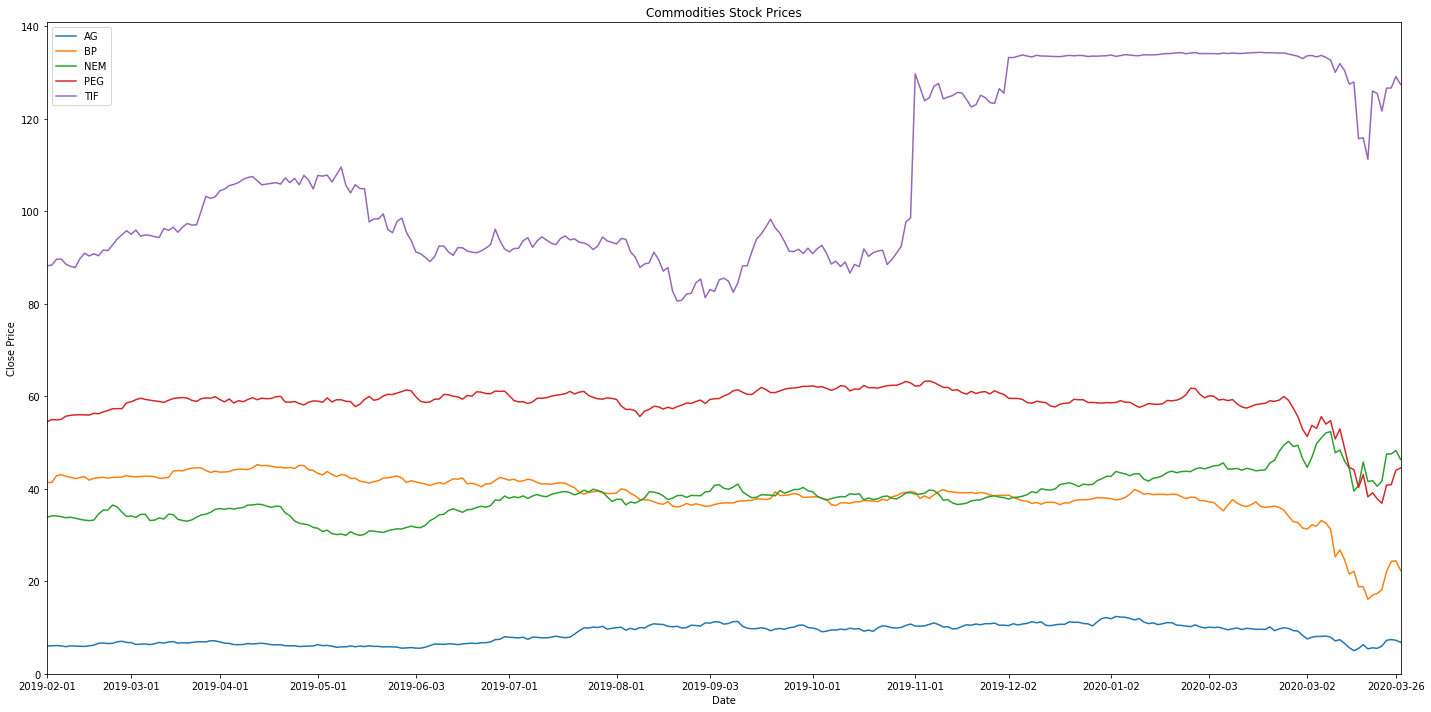

In [46]:
comm_chart = plot_data(comm_df, 'Commodities Stock Prices')

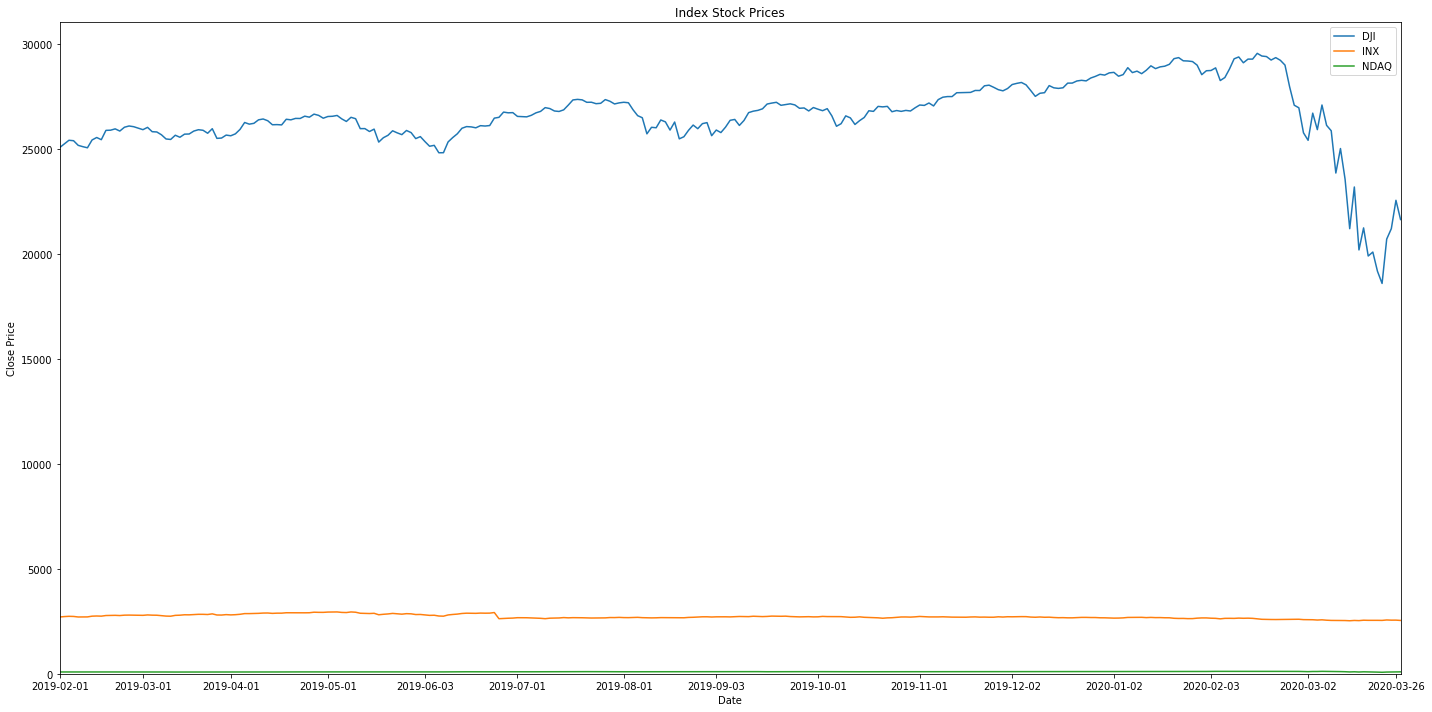

In [47]:
index_chart = plot_data(index_df, 'Index Stock Prices')

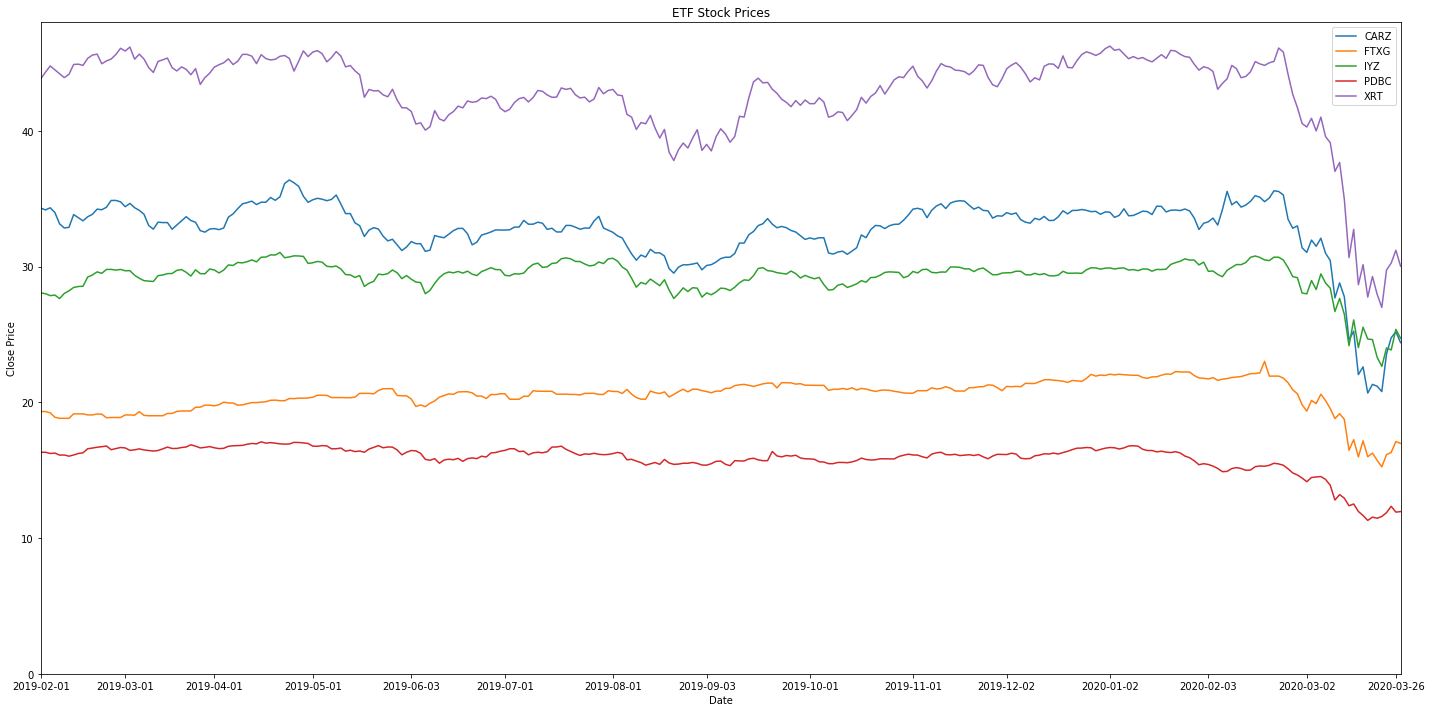

In [49]:
etf_chart = plot_data(etf_df, 'ETF Stock Prices')
plt.savefig('etf_chart.svg')